In [1]:
# -*- coding: utf-8 -*-
# @author: tongzi
# @description: a tour of machine learing classifier using scikit-learn
# @created date: 2019/08/25
# @last modification" 2019/08/25


In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

D:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
D:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
D:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [3]:
from sklearn.datasets import load_iris

In [4]:
iris = load_iris()

In [5]:
X = iris.data[:, [2, 3]]

In [6]:
y = iris.target

In [7]:
np.unique(y)

array([0, 1, 2])

In [8]:
from sklearn.model_selection import train_test_split

D:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size=0.3, 
                                                    random_state=1, 
                                                    stratify=y)

In [11]:
np.bincount(y)

array([50, 50, 50], dtype=int64)

In [12]:
np.bincount(y_train)

array([35, 35, 35], dtype=int64)

In [13]:
np.bincount(y_test)

array([15, 15, 15], dtype=int64)

In [16]:
from sklearn.preprocessing import StandardScaler

In [18]:
sc = StandardScaler()

In [19]:
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [20]:
X_train_std = sc.transform(X_train)

In [21]:
X_test_std = sc.transform(X_test)

In [22]:
from sklearn.linear_model import Perceptron

D:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [23]:
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=1)

In [24]:
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      max_iter=None, n_iter=40, n_jobs=1, penalty=None, random_state=1,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [25]:
y_pred = ppn.predict(X_test_std)

In [26]:
print(f'Misclassified samples: {(y_test != y_pred).sum()}')

Misclassified samples: 3


In [27]:
from sklearn.metrics import accuracy_score 

In [28]:
print(f'Accuracy {accuracy_score(y_pred, y_test)}')

Accuracy 0.9333333333333333


In [29]:
ppn.score(X_test_std, y_test)

0.9333333333333333

In [39]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, 
                          resolution=0.02,
                          test_idx=None):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, cmap=cmap, alpha=0.3)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class sample
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                   alpha=0.8, c = colors[idx], label=cl,
                   marker=markers[idx], edgecolor='black')
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        
        plt.scatter(X_test[:, 0], X_test[:, 1],
                   c='', edgecolor='black',
                   alpha=1.0, linewidth=1, marker='o',
                   s = 100, label='test set')
               

In [36]:
X_combined_std = np.vstack((X_train_std, X_test_std))

In [37]:
y_combined = np.hstack((y_train, y_test))

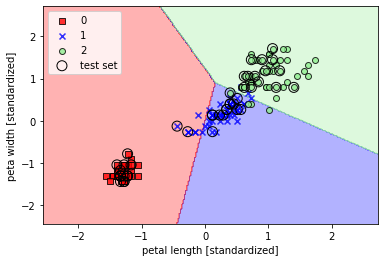

In [42]:
plot_decision_regions(X=X_combined_std, y=y_combined,
                     classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('peta width [standardized]')
plt.legend(loc='upper left')
